In [2]:
import rlssm
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from scipy import stats

In [3]:
par_path = os.path.abspath(os.path.join(os.getcwd()))
data_path = os.path.join(par_path, 'data/data.csv')
data = pd.read_csv(data_path, index_col=0)

In [4]:
model = rlssm.RLModel_2A(hierarchical_levels = 2, increasing_sensitivity=False, separate_learning_rates=True)

Using cached StanModel


In [5]:
# sampling parameters
n_iter = 3000
n_warmup = 1000
n_chains = 2

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # intitial learning value (Q0)

sensitivity_poiors = {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 1, 'sd_sd': 5}

In [6]:
model_fit = model.fit(
    data, 
    K, 
    initial_value_learning,
    warmup = n_warmup,
    iter = n_iter,
    chains = n_chains,
    sensitivity_priors=sensitivity_poiors)

Fitting the model using the priors:
sensitivity_priors {'mu_mu': 1, 'sd_mu': 5, 'mu_sd': 1, 'sd_sd': 5}
alpha_pos_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}
alpha_neg_priors {'mu_mu': 0, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 0.1}


Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.

Gradient evaluation took 0.000337 seconds
1000 transitions using 10 leapfrog steps per transition would take 3.37 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)
Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.

Gradient evaluation took 0.00028 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.8 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 3000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: bernoulli_lpmf: Probability parameter[361] is -nan, but must be finite!  (in 'unknown file name' at line 99)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: bernoulli_lpmf: Probability parameter[361] is -nan, but must be finite!  (in 'unknown file name' at line 99)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal

Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  300 / 3000 [ 10%]  (Warmup)
Iteration:  600 / 3000 [ 20%]  (Warmup)
Iteration:  600 / 3000 [ 20%]  (Warmup)
Iteration:  900 / 3000 [ 30%]  (Warmup)
Iteration:  900 / 3000 [ 30%]  (Warmup)
Iteration: 1001 / 3000 [ 33%]  (Sampling)
Iteration: 1001 / 3000 [ 33%]  (Sampling)
Iteration: 1300 / 3000 [ 43%]  (Sampling)
Iteration: 1300 / 3000 [ 43%]  (Sampling)
Iteration: 1600 / 3000 [ 53%]  (Sampling)
Iteration: 1900 / 3000 [ 63%]  (Sampling)
Iteration: 1600 / 3000 [ 53%]  (Sampling)
Iteration: 2200 / 3000 [ 73%]  (Sampling)
Iteration: 1900 / 3000 [ 63%]  (Sampling)
Iteration: 2500 / 3000 [ 83%]  (Sampling)
Iteration: 2800 / 3000 [ 93%]  (Sampling)
Iteration: 3000 / 3000 [100%]  (Sampling)

 Elapsed Time: 6.61217 seconds (Warm-up)
               10.2298 seconds (Sampling)
               16.8419 seconds (Total)

Iteration: 2200 / 3000 [ 73%]  (Sampling)
Iteration: 2500 / 3000 [ 83%]  (Sampling)
Iteration: 2800 / 3000 [ 93%]  (Sampling)


Iteration: 3000 / 3000 [100%]  (Sampling)

 Elapsed Time: 6.38546 seconds (Warm-up)
               17.0402 seconds (Sampling)
               23.4256 seconds (Total)

Checks MCMC diagnostics:
n_eff / iter for parameter log_p_t[1] is 0.00025470164132120743!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[2] is 0.00025470164132120743!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[91] is 0.00026244995731353535!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[181] is 0.0003022951362305541!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[271] is 0.0002818956388357931!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[361] is 0.0002956285855283074!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n

In [7]:
model_fit.rhat

,rhat,variable
0,1.000121,mu_alpha_pos
1,0.999728,mu_alpha_neg
2,1.000778,mu_sensitivity
3,0.999893,sd_alpha_pos
4,0.999543,sd_alpha_neg
5,1.001338,sd_sensitivity
6,0.999826,z_alpha_pos[1]
7,0.999966,z_alpha_pos[2]
8,0.999834,z_alpha_pos[3]
9,0.999574,z_alpha_pos[4]


In [8]:
model_fit.waic

{'lppd': -171.9843408798779,
 'p_waic': 7.06858218721226,
 'waic': 358.1058461341803,
 'waic_se': 23.26249850211798}

In [9]:
model_fit.samples.describe()

,chain,draw,transf_mu_alpha_pos,transf_mu_alpha_neg,transf_mu_sensitivity,alpha_pos_sbj[1],alpha_pos_sbj[2],alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_pos_sbj[5],alpha_neg_sbj[1],alpha_neg_sbj[2],alpha_neg_sbj[3],alpha_neg_sbj[4],alpha_neg_sbj[5],sensitivity_sbj[1],sensitivity_sbj[2],sensitivity_sbj[3],sensitivity_sbj[4],sensitivity_sbj[5]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.500000,999.500000,0.044373,0.479516,0.407260,0.039806,0.053841,0.026868,0.037233,0.081950,0.480944,0.476849,0.479656,0.481118,0.481096,0.189554,0.304043,0.519333,0.380963,0.624131
std,0.500063,577.422379,0.019706,0.230505,0.254736,0.022414,0.025286,0.016957,0.020885,0.057387,0.231410,0.232033,0.232845,0.231450,0.231443,0.083996,0.100171,0.243147,0.175773,0.199971
min,0.000000,0.000000,0.007005,0.000276,0.042616,0.003370,0.006273,0.003093,0.005458,0.009655,0.000264,0.000289,0.000276,0.000278,0.000266,0.047862,0.108625,0.126542,0.116272,0.222332
25%,0.000000,499.750000,0.030100,0.296784,0.273129,0.024245,0.037731,0.016552,0.021680,0.042980,0.297526,0.292825,0.296170,0.301782,0.298526,0.133525,0.240653,0.360841,0.257724,0.490447
50%,0.500000,999.500000,0.040950,0.458045,0.359673,0.034808,0.050209,0.021044,0.031911,0.064113,0.461795,0.454367,0.458901,0.458712,0.460193,0.171642,0.287134,0.484225,0.339966,0.586297
75%,1.000000,1499.250000,0.054509,0.650998,0.472001,0.050384,0.064718,0.031550,0.047870,0.101062,0.653310,0.648636,0.655029,0.655489,0.651123,0.223533,0.342503,0.623985,0.458654,0.711759
max,1.000000,1999.000000,0.182364,0.999920,3.895500,0.247386,0.273719,0.202637,0.168617,0.354636,0.999928,0.999924,0.999928,0.999919,0.999923,1.051608,1.174127,3.171610,1.903331,2.597931


In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

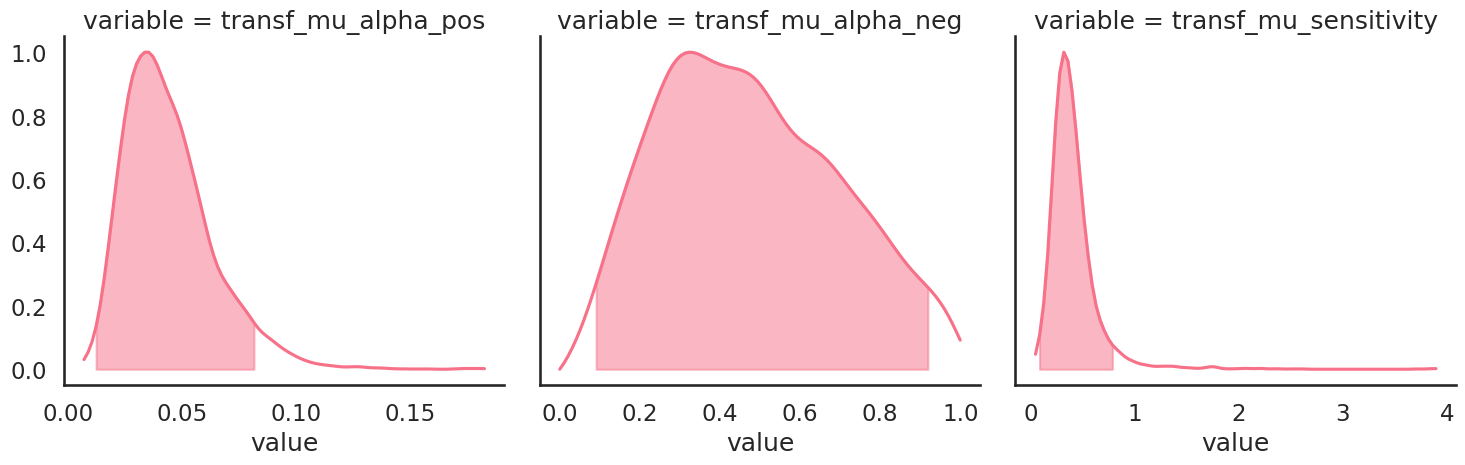

In [11]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05)


In [12]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'
data.loc[(data.cor_option == 4) & (data.inc_option == 1), 'choice_pair'] = 'AD'
data.loc[(data.cor_option == 3) & (data.inc_option == 2), 'choice_pair'] = 'BC'

data['block_bins'] = pd.cut(data.trial_block, 6, labels=np.arange(1, 7))

In [13]:
pp_grouped = model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['choice_pair', 'block_bins'], 
                                                                 n_posterior_predictives=100)

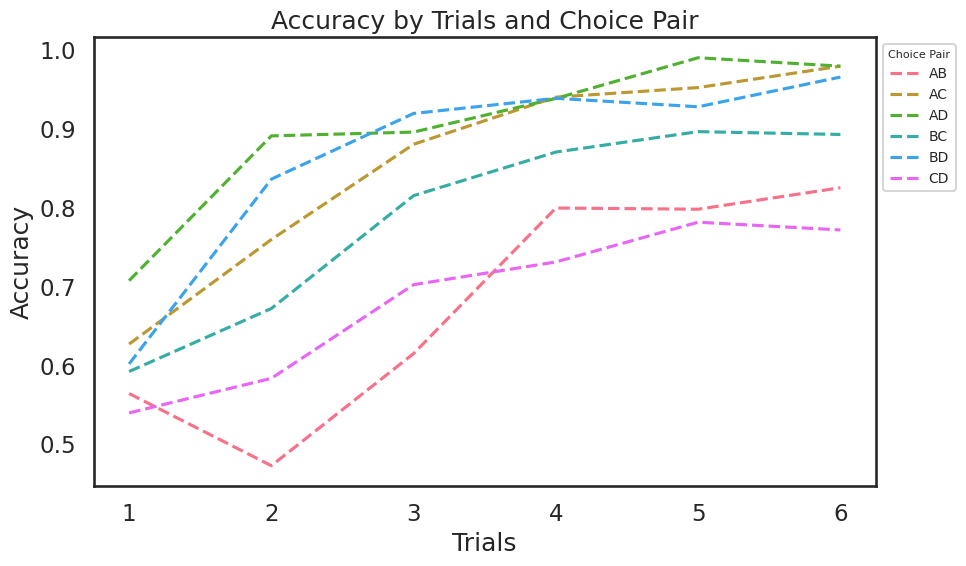

In [14]:
group_mean = pp_grouped.groupby(['block_bins', 'choice_pair']).agg({'mean_accuracy': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=group_mean, x='block_bins', y='mean_accuracy', hue='choice_pair' ,linestyle='--')

# 设置图形标题和标签
plt.title('Accuracy by Trials and Choice Pair')
plt.xlabel('Trials')
plt.ylabel('Accuracy')
plt.legend(title='Choice Pair', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10, title_fontsize="8")

# 显示图形
plt.tight_layout()
plt.show()

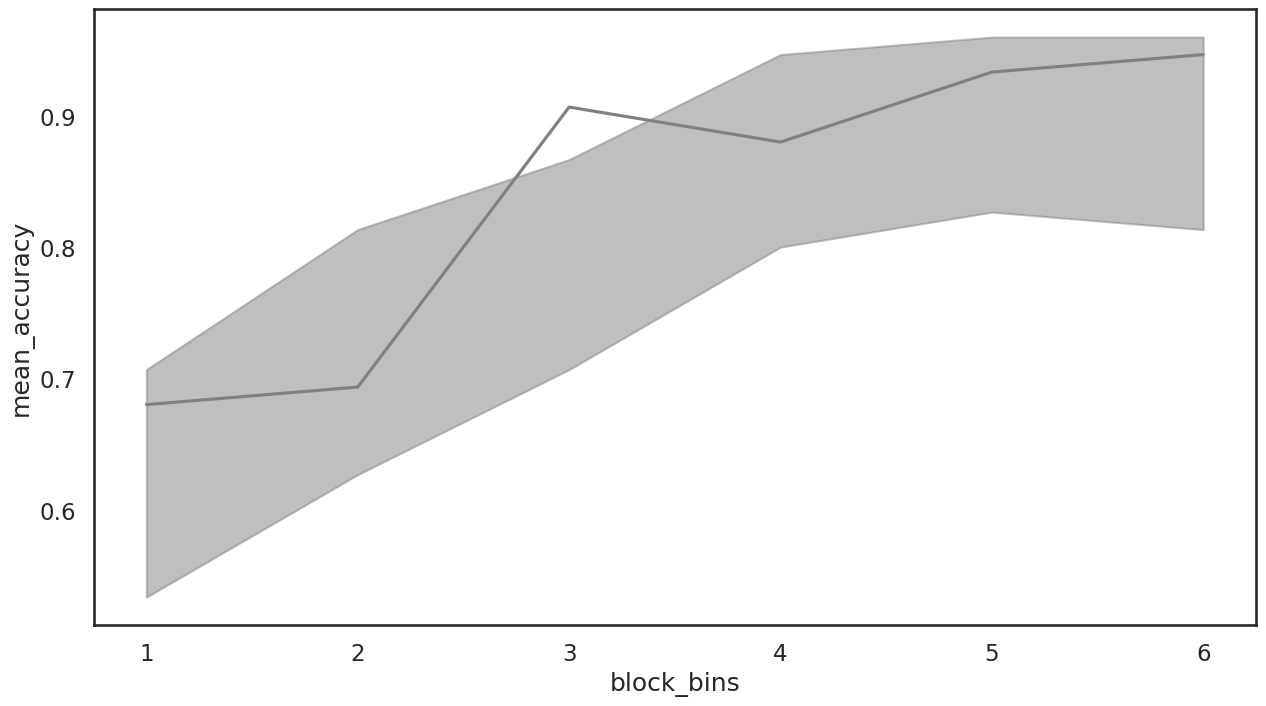

In [15]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100)